In [1]:
import redis
import json

# Define connection variables
host = 'localhost'
port =  6379
password = None

# Connect to Redis
r = redis.Redis(host=host, port=port, password=password, decode_responses=True)
print('Connected to Redis')

r.flushdb()


Connected to Redis


True

# Automated Marketing Campaigns

## Description of the use case
This use case involves automating marketing campaigns based on user behavior and interactions. By analyzing user data, banks can send targeted marketing messages and promotions to increase engagement and conversions.

## Redis Data Structures Used
- **Hashes**: To store user profiles and interaction data.
- **Streams**: To capture and process real-time user interactions.
- **Pub/Sub**: To send notifications for marketing campaigns.


In [4]:
r.flushdb()
# Mock data for the use case
user_data = {
    'user_1001': {'name': 'Alice', 'email': 'alice@example.com', 'interactions': 5},
    'user_1002': {'name': 'Bob', 'email': 'bob@example.com', 'interactions': 10},
    'user_1003': {'name': 'Charlie', 'email': 'charlie@example.com', 'interactions': 15},
}

# Use Hashes to store user profiles and interaction data
for user_id, profile in user_data.items():
    r.hset(user_id, mapping=profile)

# Use Streams to capture real-time user interactions
r.xadd('user_interactions', {'user_id': 'user_1001', 'interaction': 'viewed_product'})
r.xadd('user_interactions', {'user_id': 'user_1002', 'interaction': 'clicked_interested'})

# Function to process user interactions and trigger marketing campaigns
def process_interactions_and_trigger_campaigns():
    stream_entries = r.xrange('user_interactions')
    for entry in stream_entries:
        user_id = entry[1]['user_id']
        interaction = entry[1]['interaction']
        r.hincrby(user_id, 'interactions', 1)
        if int(r.hget(user_id, 'interactions')) > 5:  # Example trigger condition
            campaign_message = f"Dear {r.hget(user_id, 'name')}, check out our new products!"
            r.publish('marketing_campaigns', campaign_message)

# Process the interactions and trigger campaigns
process_interactions_and_trigger_campaigns()

# Print the user profiles with updated interaction counts
for user_id in user_data.keys():
    print(f"{user_id}: {r.hgetall(user_id)}")


user_1001: {'name': 'Alice', 'email': 'alice@example.com', 'interactions': '6'}
user_1002: {'name': 'Bob', 'email': 'bob@example.com', 'interactions': '11'}
user_1003: {'name': 'Charlie', 'email': 'charlie@example.com', 'interactions': '15'}


In [ ]:
# To see real time notifications, follow the below

# Connect via redis-cli
# redis-cli -h <hostname> -p <port> -a <auth>
# Issue the below command to monitor the notification channels
# SUBSCRIBE marketing_campaigns


# # Example of subscribing to marketing campaigns (this would normally be in a separate consumer application)
# def listen_for_campaigns():
#     pubsub = r.pubsub()
#     pubsub.subscribe('marketing_campaigns')
#     print('Listening for marketing campaigns...')
#     for message in pubsub.listen():
#         if message['type'] == 'message':
#             print(f'Marketing Campaign: {message['data']}')

# # Listen for marketing campaigns (example)
# listen_for_campaigns()  # Uncomment to test listening for marketing campaigns

### Expected output on CLI

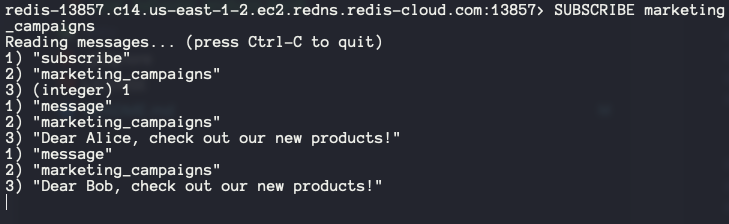